In [169]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import scipy.fftpack
import pyproj
from pyproj import Proj
import os
from bokeh.plotting import figure, output_file, show
from bokeh.charts import BoxPlot, output_file, show
import matplotlib.mlab as mlab

In [7]:
path = 'adcp_data/'
listing = os.listdir(path)
print listing

['sullivanpt_005min.mat', 'sullivanpt_005min_histogram.mat', 'sullivanpt_2nd_deployment_005min.mat', 'sullivanpt_2nd_deployment_005min_histogram.mat', 'walkerst_005min.mat', 'walker_005min_histogram.mat', 'wymanst_005min.mat', 'wyman_005_histogram.mat']


In [7]:
mat = io.loadmat(path + listing[4])  
hist = io.loadmat(path + listing[5])

In [8]:
sullivan1 = io.loadmat(path + listing[1])
sullivan2 = io.loadmat(path + listing[3])
walker = io.loadmat(path + listing[5])
wyman = io.loadmat(path + listing[7])

In [9]:
def keyed(mat):
    keys = mat.keys()
    
    for i in keys:
        try:
            print i, mat[i].shape
            pass
        except AttributeError:
            print '... Error'
            continue

In [11]:
keyed(sullivan2)

cmag (8040, 18)
nfrac (18, 26)
zbins (18, 1)
__header__ ... Error
__globals__ ... Error
pa (8040, 1)
Vv (1, 26)
__version__ ... Error
cdir (8040, 18)
ta (8040, 1)


In [77]:
depth = sullivan2['zbins']
depth[-j]     

array([ 6.75])

In [14]:
np.nanmax(sullivan2['cmag'])

2.2148918709499115

In [24]:
pd.DataFrame(hist.items(), columns=['ta', 'cmag'])

,ta,cmag
0,cmag,"[[0.852630726588, 0.896970273468, 0.9318805977..."
1,__globals__,[]
2,nfrac,"[[3.1717597471, 4.86828240253, 5.82718651212, ..."
3,zbins,"[[1.7, 2.2, 2.7, 3.2, 3.7, 4.2, 4.7, 5.2, 5.7,..."
4,__header__,"MATLAB 5.0 MAT-file, Platform: MACI64, Created..."
5,pa,"[[23.135844328], [23.1807474016], [23.23018435..."
6,Vv,"[[0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0...."
7,__version__,1.0
8,cdir,"[[-92.8442328059, -93.9769273491, -93.91841375..."
9,ta,"[[282.835069444, 282.838541667, 282.842013889,..."


In [145]:
infile = sullivan2
x = np.squeeze(infile['ta'].T)
y = infile['cmag']
yMean = np.nanmean(infile['cmag'],axis=1)
yMin = np.nanmin(infile['cmag'],axis=1)
yMax = np.nanmax(infile['cmag'],axis=1)
yPres = infile['pa'] - np.nanmean(infile['pa'])

print np.nanmax(yMin)
print np.nanmax(yMax)
print np.nanmean(yMean)
print np.nanmax(yPres) - np.nanmin(yPres)
print np.nanmean(yMin)
print np.nanmean(yMax)
print np.nanmean(infile['cmag'])

1.70209870454
2.21489187095
0.906132833767
3.96999679041
0.534781728343
1.00692864581
0.906001923121


In [67]:
a = np.array([[1, 2, 3],[4, 5, 6]])
for i in range(a.shape[1]):
    print a[:,i]


[1 4]
[2 5]
[3 6]


In [70]:
xS = walker['ta'].T
xA = wyman['ta'].T
walkerMean = np.nanmean(walker['cmag'],axis=1)
wymanMean = np.nanmin(wyman['cmag'],axis=1)
print xS[305]
print xA[305]

[ 302.39409722]
[ 302.39449398]


In [80]:
t = np.nanargmax(yMax)
low = t-180
high = t+180
print yMax.shape

(8040,)


In [74]:
# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Mean Current Comparison", x_axis_label='DateTime Value', y_axis_label='Velocity')

# add a line renderer with legend and line thickness
p.line(xS[0:305,0], walkerMean[0:305], legend="Walker St. Mean", line_width=2, line_color='blue')
p.line(xA[0:305,0], wymanMean[0:305], legend="Wyman Ave. Mean.", line_width=2, line_color='red')


# show the results
show(p)

In [26]:
'''Sullivan Slice'''
# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Current Magnitude:Sullivan Point", x_axis_label='DateTime Value', y_axis_label='Velocity')

# add a line renderer with legend and line thickness
p.line(x[low:high], yMean[low:high], legend="Mean.", line_width=2, line_color='blue')
p.line(x[low:high], yMin[low:high], legend="Min.", line_width=2, line_color='red')
p.line(x[low:high], yMax[low:high], legend="Max.", line_width=2, line_color='green')
#p.line(x[low:high,0], yPres[low:high,0], legend="Max.", line_width=2, line_color='black')

# show the results
show(p)

In [82]:
'''Sullivan Slice'''
# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="Current Magnitude:Sullivan Point", x_axis_label='DateTime Value', y_axis_label='Velocity')

for i in range(y.shape[1]):
    p.line(x[low:high], y[low:high,i], legend=".", line_width=1, line_color='blue')


# show the results
show(p)

In [81]:
# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='DateTime Value', y_axis_label='Velocity')

# add a line renderer with legend and line thickness
p.line(x[:,0], yMean[:], legend="Mean.", line_width=2, line_color='blue')
p.line(x[:,0], y2[:], legend="Min.", line_width=2, line_color='red')


# show the results
show(p)

IndexError: too many indices for array

In [ ]:
dp = np.max(y0)-np.min(y0)

In [ ]:
g = 9.81
rho = 1019

In [ ]:
dp / (rho * g)

In [ ]:
dfn = pd.DataFrame(mat.get('nfrac'))
dfn

In [ ]:
dfVv = pd.DataFrame(mat.get('Vv'))
dfVv

In [30]:
(2367 - 1849) / 1849.

0.280151433207139

In [31]:
np.pi * 1.25 ** 2

4.908738521234052

In [32]:
(7.5-4.9)/4.9

0.5306122448979591

In [33]:
(13258-11120)/11120.

0.19226618705035972

In [39]:
a = np.array([[1, 2, 3],[4, 5, 6]])
a[:,1]

array([2, 5])

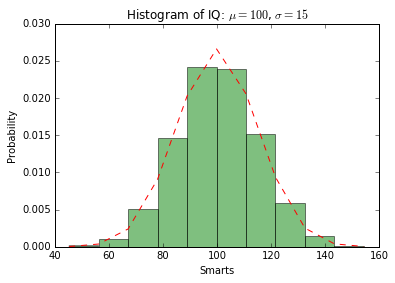

In [11]:
# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 10
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [173]:
y
depth[:,0]
df = pd.DataFrame(Binz = arange(1,18) velocities=y)
#df.columns = depth[:,0]

In [195]:
df.names

AttributeError: 'DataFrame' object has no attribute 'names'

In [ ]:
q1 = df.quantile(q=0.25)
q2 = df.quantile(q=0.5)
q3 = df.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

output_file("boxplot.html")

p = figure(tools="save", background_fill="#EFE8E2", title="")

# If no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper = [min([x,y]) for (x,y) in zip(list(qmax.iloc[:,0]),upper) ]
lower = [max([x,y]) for (x,y) in zip(list(qmin.iloc[:,0]),lower) ]

# stems
p.segment(df, upper, df, q3, line_width=2, line_color="black")
p.segment(df, lower, df, q1, line_width=2, line_color="black")

# boxes
p.rect(df, (q3+q2)/2, 0.7, q3-q2,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(df, (q2+q1)/2, 0.7, q2-q1,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(df, lower, 0.2, 0.01, line_color="black")
p.rect(df, upper, 0.2, 0.01, line_color="black")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

show(p)

ERROR:C:\Users\DBerry\AppData\Local\Continuum\Anaconda\lib\site-packages\bokeh\validation\check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 31779813-4cfa-4005-a046-bfb316ce0a92
ERROR:C:\Users\DBerry\AppData\Local\Continuum\Anaconda\lib\site-packages\bokeh\validation\check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 34debb13-59d6-400d-9c86-4d1555bcb7c0
ERROR:C:\Users\DBerry\AppData\Local\Continuum\Anaconda\lib\site-packages\bokeh\validation\check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: b6e5bbb2-6b47-4bfe-96ae-e4982305af9c
ERROR:C:\Users\DBerry\AppData\Local\Continuum\Anaconda\lib\site-packages\bokeh\validation\check.pyc:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDa

In [ ]:


# Prepare outlier data for plotting, we need coordinate for every outlier.
outx = []
outy = []
for cat in cats:
    # only add outliers if they exist
    if not out.loc[cat].empty:
        for value in out[cat]:
            outx.append(cat)
            outy.append(value)





# outliers
p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)



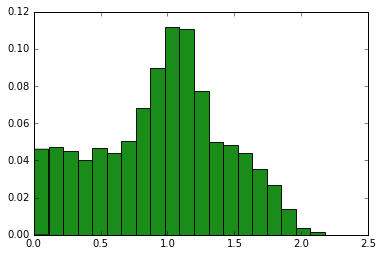

In [80]:
j = 11
myarray = y[:,-j]
weights = np.ones_like(myarray)/len(myarray)
#plt.hist(myarray, weights=weights)
n, bins, patches = plt.hist(y[:,j],bins=20, facecolor='green', weights=weights, alpha=0.9)


In [136]:
# Generate some synthetic time series for six different categories
#cats = list("abcdef")
#yy = np.random.randn(2000)
#g = np.random.choice(cats, 2000)
#for i, l in enumerate(cats):
#    yy[g == l] += i // 2
#df = pd.DataFrame(dict(score=yy, group=g))

# Find the quartiles and IQR foor each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat][0]) | (group.score < lower.loc[cat][0])]['score']
out = groups.apply(outliers).dropna()

# Prepare outlier data for plotting, we need coordinate for every outlier.
outx = []
outy = []
for cat in cats:
    # only add outliers if they exist
    if not out.loc[cat].empty:
        for value in out[cat]:
            outx.append(cat)
            outy.append(value)

output_file("boxplot.html")

p = figure(tools="save", background_fill="#EFE8E2", title="", x_range=cats)

# If no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.iloc[:,0]),upper.score) ]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.iloc[:,0]),lower.score) ]

# stems
p.segment(cats, upper.score, cats, q3.score, line_width=2, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_width=2, line_color="black")

# boxes
p.rect(cats, (q3.score+q2.score)/2, 0.7, q3.score-q2.score,
    fill_color="#E08E79", line_width=2, line_color="black")
p.rect(cats, (q2.score+q1.score)/2, 0.7, q2.score-q1.score,
    fill_color="#3B8686", line_width=2, line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12pt"

show(p)

In [192]:
upper

0     1.293944
1          NaN
2          NaN
3     1.889215
4     1.975431
5     2.035604
6     2.082531
7     2.131846
8     2.168945
9     2.200769
10    2.233443
11    2.255984
12    2.265769
13    2.270012
14    2.274449
15    2.273103
16    2.276067
17    2.275255
dtype: float64